# **1. Implementation of Linear Regression class**

In [41]:
import numpy as np #To access NumPy and its functions

class LinearRegression:
    def __init__(self, batch_size=32, regularization=0, max_epochs=100, patience=3):  ## __init__ is the first method that is called when you initilaze an object ## self is used to access the attribue data. 
        
        self.batch_size = batch_size
        self.regularization = regularization
        self.max_epochs = max_epochs
        self.patience = patience
        self.pre_loss = [] 
        self.new_loss = [] 
        self.update_weight = []
        self.update_bias = []

    def fit(self, X, y, batch_size=32, regularization=0, max_epochs=100, patience=3, lr=0.001):
        
        self.batch_size = batch_size
        self.regularization = regularization
        self.max_epochs = max_epochs
        self.patience = patience
        self.lr = lr
        # Sample size and feature count
        trial_num, feature_num = X.shape[0], X.shape[1]
        resulted_num = y.shape[1]
        # Initialize the weights and bias using the X and Y shapes as a guide..
        self.weights = np.random.randn(feature_num,resulted_num) * 0.01
        self.bias = np.zeros((1,resulted_num))
        # Random split
        random_split = int(0.9 * trial_num)
        training_X_Data, validation_X_Data = X[:random_split], X[random_split:]
        training_y_Data, validation_y_Data = y[:random_split], y[random_split:]
        # Intilization
        ideal_Wvalues = self.weights
        ideal_Bvalues = self.bias
        ideal_Lvalues = float("inf")
        zero_improvements = 0
        # Implement the training loop.
        self.new_loss = []
        for epoch in range(max_epochs):
          self.pre_loss = []
          for i in range(0,random_split, batch_size):
            X_batch = training_X_Data[i:i + batch_size]
            y_batch = training_y_Data[i:i + batch_size]
            # calculating the loss and the prediction
            pred_Y = X_batch.dot(self.weights) + self.bias
            regularization_term = (self.regularization/2*batch_size) * np.sum(np.square(self.weights))
            pre_loss = np.mean((y_batch-pred_Y)**2) + regularization_term
            self.pre_loss.append(pre_loss) 
            # calculating the loss's gradient with regard to both bias and weight
            dw = (1/batch_size) * (X_batch.T).dot(pred_Y-y_batch) + (self.regularization * self.weights)
            db = (1/batch_size) * np.sum(pred_Y-y_batch)
            # Update weights and bias
            self.weights -= lr * dw
            self.bias -= lr * db
          # Update predicted y value
          self.new_loss.append(np.mean(self.pre_loss))
          pred_Y = validation_X_Data.dot(self.weights) + self.bias
          # Validating loss and patience
          loss_validation = np.mean((validation_y_Data - pred_Y) ** 2)
          if loss_validation < ideal_Lvalues:
            ideal_Wvalues = self.weights
            ideal_Bvalues = self.bias
            ideal_Lvalues = loss_validation
            zero_improvements = 0
          else:
            zero_improvements +=1
            if zero_improvements >= patience:
              break
        self.weights == ideal_Wvalues
        self.bias == ideal_Bvalues

        self.update_weight = self.weights
        self.update_bias = self.bias

    def predict(self, X):
        return X.dot(self.weights) + self.bias

    def score(self, X, y):
        pred_Y = self.predict(X)
        return np.mean((pred_Y - y) ** 2)

# **2. Regression with a single output**  


In [42]:
import pandas as pd
from sklearn import datasets
from sklearn.model_selection import train_test_split
import matplotlib.pyplot as plt


# Loading Iris DataSet
iris = datasets.load_iris()

# Iris DataFrame
iris_df = pd.DataFrame(iris['data'], columns=iris['feature_names'])
iris_df['target']=iris['target']

# Iris data preparation for training a linear regression model
X = iris.data[:,:3]
y = iris.data[:,3:]
same_split = iris.target

# Splitting training and testing data
training_X_Data, X_test, training_y_Data, y_test = train_test_split(X, y, test_size=0.10, random_state=32, stratify = same_split)
lr = LinearRegression()

## **Iris DataSet Four Distinct Model**

**Model 1:** Predicting Petal Width Based on Sepal Length, Sepal Width, and Petal Length

Input: Sepal Length, Sepal Width, Petal Length

Output: Petal Width



Weights before regularization: 
[[0.61984193]
 [0.03195801]]
Bias before regularization: 
[[0.04931631]]
MSE before regularization: 
1.850107836158639
Weights after regularization: 
[[0.61448379]
 [0.0366715 ]]
Bias after regularization: 
[[0.05733746]]
MSE after regularization: 
1.8664922616526454


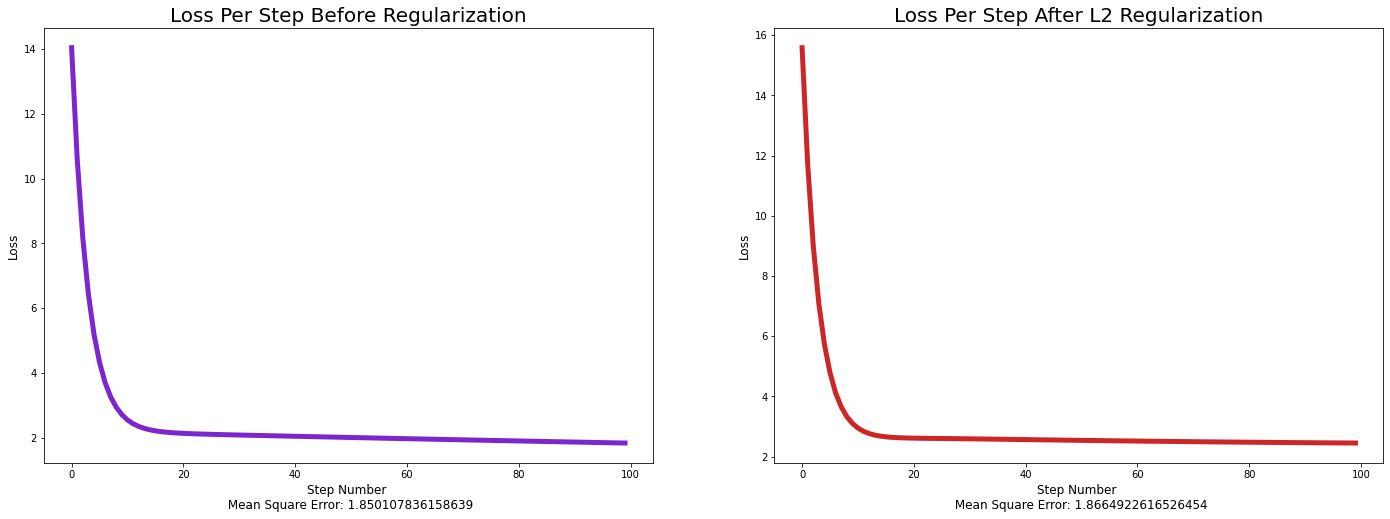

In [43]:
# Iris Data Model 1
x1 = iris.data[:,[0,1]]
y1 = iris.data[:,[2]]
same_split = iris.target
x1_training, x1_test, y1_training, y1_test = train_test_split(x1, y1, test_size=0.10, random_state=32, stratify = same_split)
fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(24,8))
lr.fit(x1_training, y1_training, regularization=0)

# Plotting the loss against the step number
x_axis = np.arange(len(lr.new_loss))
y_axis = lr.new_loss
ax1.plot(x_axis, y_axis, lw=5, c='#7D26CD')
ax1.set_title("Loss Per Step Before Regularization", size=20)
ax1.set_xlabel("Step Number \n Mean Square Error: "+str(lr.score(x1_test, y1_test)), size=12)
ax1.set_ylabel("Loss", size=12)
print("Weights before regularization: ")
print(lr.update_weight)
print("Bias before regularization: ")
print(lr.update_bias)
print("MSE before regularization: ")
print(lr.score(x1_test, y1_test))

# Fitting training set to the model
lr.fit(x1_training, y1_training, regularization=0.1)

# Plotting the loss against the step number
x_axis = np.arange(len(lr.new_loss))
y_axis = lr.new_loss
ax2.plot(x_axis, y_axis, lw=5, c='#CD2626')
ax2.set_title("Loss Per Step After L2 Regularization", size=20)
ax2.set_xlabel("Step Number \n Mean Square Error: "+str(lr.score(x1_test, y1_test)), size=12)
ax2.set_ylabel("Loss", size=12)
print("Weights after regularization: ")
print(lr.update_weight)
print("Bias after regularization: ")
print(lr.update_bias)
print("MSE after regularization: ")
print(lr.score(x1_test, y1_test))



**Model 2:** Predicting Petal Width Based on Sepal Length and Sepal Width

Input: Sepal Length, Sepal Width

Output: Petal Width



Weights before regularization: 
[[ 0.20841083]
 [-0.00549898]]
Bias before regularization: 
[[0.01139485]]
MSE before regularization: 
0.3197938595662647
Weights after regularization: 
[[ 0.2117458 ]
 [-0.01383986]]
Bias after regularization: 
[[0.01461424]]
MSE after regularization: 
0.31520044056814744


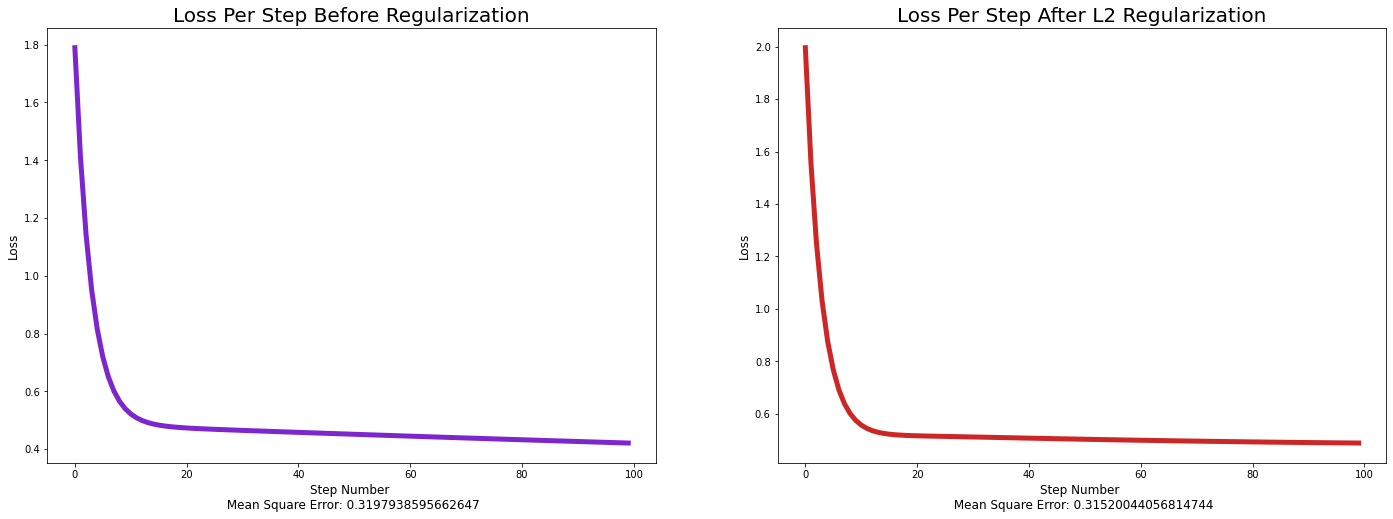

In [44]:
# Iris Data Model 2
x2 = iris.data[:,:2]
y2 = iris.data[:,3:]
same_split = iris.target
x2_training, x2_test, y2_training, y2_test = train_test_split(x2, y2, test_size=0.10, random_state=32, stratify = same_split)
fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(24,8))
lr.fit(x2_training, y2_training, regularization=0)

# Plotting the loss against the step number
x_axis = np.arange(len(lr.new_loss))
y_axis = lr.new_loss
ax1.plot(x_axis, y_axis, lw=5, c='#7D26CD')
ax1.set_title("Loss Per Step Before Regularization", size=20)
ax1.set_xlabel("Step Number \n Mean Square Error: "+str(lr.score(x2_test, y2_test)), size=12)
ax1.set_ylabel("Loss", size=12)
print("Weights before regularization: ")
print(lr.update_weight)
print("Bias before regularization: ")
print(lr.update_bias)
print("MSE before regularization: ")
print(lr.score(x2_test, y2_test))

# Fitting training set to the model
lr.fit(x2_training, y2_training, regularization=0.1)

# Plotting the loss against the step number
x_axis = np.arange(len(lr.new_loss))
y_axis = lr.new_loss
ax2.plot(x_axis, y_axis, lw=5, c='#CD2626')
ax2.set_title("Loss Per Step After L2 Regularization", size=20)
ax2.set_xlabel("Step Number \n Mean Square Error: "+str(lr.score(x2_test, y2_test)), size=12)
ax2.set_ylabel("Loss", size=12)
print("Weights after regularization: ")
print(lr.update_weight)
print("Bias after regularization: ")
print(lr.update_bias)
print("MSE after regularization: ")
print(lr.score(x2_test, y2_test))



**Model 3:** Predicting Petal Width Based on Sepal Width and Petal Length

Input: Sepal Width, Petal Length

Output: Petal Width



Weights before regularization: 
[[0.03423148]
 [0.30074315]]
Bias before regularization: 
[[0.01795071]]
MSE before regularization: 
0.052708366622023786
Weights after regularization: 
[[0.04295649]
 [0.29210606]]
Bias after regularization: 
[[0.02132691]]
MSE after regularization: 
0.05853895323981979


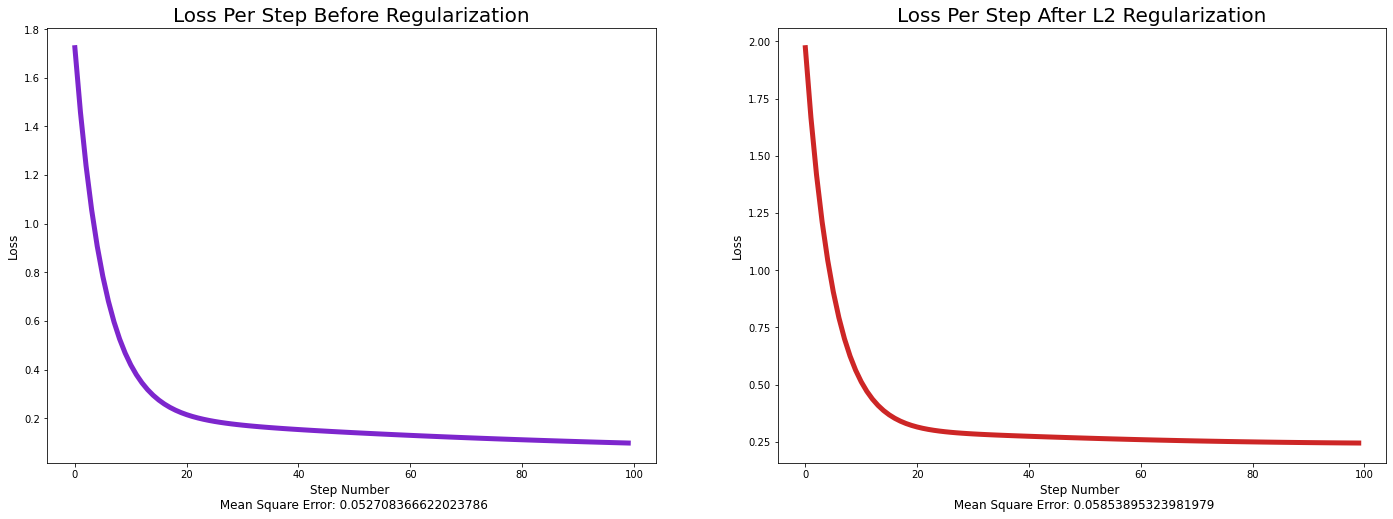

In [45]:
# Iris Data Model 3
x3 = iris.data[:,1:3]
y3 = iris.data[:,3:]
same_split = iris.target
x3_training, x3_test, y3_training, y3_test = train_test_split(x3, y3, test_size=0.10, random_state=32, stratify = same_split)
fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(24,8))
lr.fit(x3_training, y3_training, regularization=0)

# Plotting the loss against the step number
x_axis = np.arange(len(lr.new_loss))
y_axis = lr.new_loss
ax1.plot(x_axis, y_axis, lw=5, c='#7D26CD')
ax1.set_title("Loss Per Step Before Regularization", size=20)
ax1.set_xlabel("Step Number \n Mean Square Error: "+str(lr.score(x3_test, y3_test)), size=12)
ax1.set_ylabel("Loss", size=12)
print("Weights before regularization: ")
print(lr.update_weight)
print("Bias before regularization: ")
print(lr.update_bias)
print("MSE before regularization: ")
print(lr.score(x3_test, y3_test))

# Fitting training set to the model
lr.fit(x3_training, y3_training, regularization=0.1)

# Plotting the loss against the step number
x_axis = np.arange(len(lr.new_loss))
y_axis = lr.new_loss
ax2.plot(x_axis, y_axis, lw=5, c='#CD2626')
ax2.set_title("Loss Per Step After L2 Regularization", size=20)
ax2.set_xlabel("Step Number \n Mean Square Error: "+str(lr.score(x3_test, y3_test)), size=12)
ax2.set_ylabel("Loss", size=12)
print("Weights after regularization: ")
print(lr.update_weight)
print("Bias after regularization: ")
print(lr.update_bias)
print("MSE after regularization: ")
print(lr.score(x3_test, y3_test))


**Model 4:** Predicting Petal Width Based on Sepal Length and Petal Length

Input: Sepal Length, Petal Length

Output: Petal Width

Weights before regularization: 
[[0.05540067]
 [0.24676172]]
Bias before regularization: 
[[-0.00203601]]
MSE before regularization: 
0.07014812027098073
Weights after regularization: 
[[0.06189301]
 [0.23693984]]
Bias after regularization: 
[[-0.00386637]]
MSE after regularization: 
0.0756620650729247


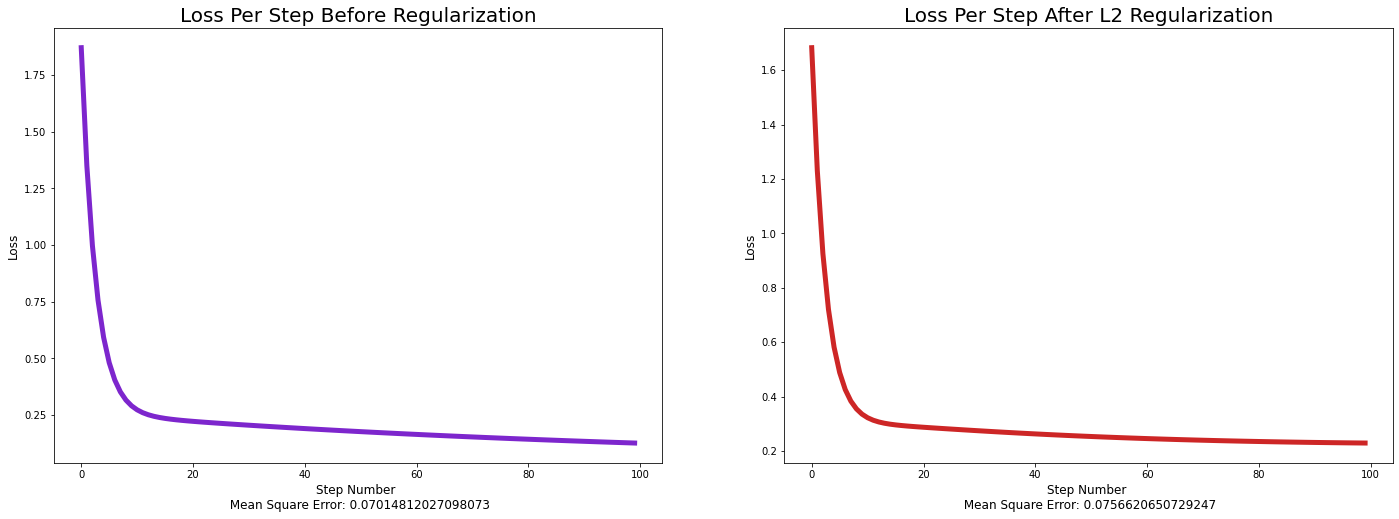

In [46]:
# Iris Data Model 4
x4 = iris.data[:,[0,2]]
y4 = iris.data[:,3:]
same_split = iris.target
x4_training, x4_test, y4_training, y4_test = train_test_split(x4, y4, test_size=0.10, random_state=32, stratify = same_split)
fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(24,8))
lr.fit(x4_training, y4_training, regularization=0)

# Plotting the loss against the step number
x_axis = np.arange(len(lr.new_loss))
y_axis = lr.new_loss
ax1.plot(x_axis, y_axis, lw=5, c='#7D26CD')
ax1.set_title("Loss Per Step Before Regularization", size=20)
ax1.set_xlabel("Step Number \n Mean Square Error: "+str(lr.score(x4_test, y4_test)), size=12)
ax1.set_ylabel("Loss", size=12)
print("Weights before regularization: ")
print(lr.update_weight)
print("Bias before regularization: ")
print(lr.update_bias)
print("MSE before regularization: ")
print(lr.score(x4_test, y4_test))

# Fitting training set to the model
lr.fit(x4_training, y4_training, regularization=0.1)

# Plotting the loss against the step number
x_axis = np.arange(len(lr.new_loss))
y_axis = lr.new_loss
ax2.plot(x_axis, y_axis, lw=5, c='#CD2626')
ax2.set_title("Loss Per Step After L2 Regularization", size=20)
ax2.set_xlabel("Step Number \n Mean Square Error: "+str(lr.score(x4_test, y4_test)), size=12)
ax2.set_ylabel("Loss", size=12)
print("Weights after regularization: ")
print(lr.update_weight)
print("Bias after regularization: ")
print(lr.update_bias)
print("MSE after regularization: ")
print(lr.score(x4_test, y4_test))


# **3. Regression with Multiple Outputs**

In [47]:
import scipy.io as sio

In [48]:
# Mounting google drive
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [49]:
# Loading Traffic Flow data
path_trafflow = "/content/drive/MyDrive/ml/traffic_dataset.mat"
data_trafflow = sio.loadmat(path_trafflow)

# Dividing data into train and test set
X_Training = data_trafflow["tra_X_tr"]
Y_Training = data_trafflow["tra_Y_tr"].T
X_Test = data_trafflow["tra_X_te"]
Y_Test = data_trafflow["tra_Y_te"].T
adj_mat = data_trafflow['tra_adj_mat']

# Removing single dimensional entries from shape of array
X_Training = X_Training.squeeze()
X_Test = X_Test.squeeze()

# Converting sparse matrix to dense matrix
Con_TrainingXdata = []
Con_TestXdata = []
for i in range(X_Training.shape[0]):
    Con_TrainingXdata.append(X_Training[i].todense())

for i in range(X_Test.shape[0]):
    Con_TestXdata.append(X_Test[i].todense())

# Converting data to numpy array
Con_TrainingXdata = np.array(Con_TrainingXdata)
Con_TestXdata = np.array(Con_TestXdata)

# reshaping data to train the job one linear regression model
Con_TrainingXdata = np.reshape(Con_TrainingXdata, (1261, -1))
Y_Training = np.reshape(Y_Training, (1261, -1))
Con_TestXdata = np.reshape(Con_TestXdata, (840, -1))
Y_Test = np.reshape(Y_Test, (840, -1))

In [50]:
# Training Linear Regression model 
lr.fit(Con_TrainingXdata, Y_Training, batch_size=16, regularization=0.1, max_epochs=100, patience=3,  lr=0.001)

# Traffic Volume Prediction for Test Data
lr.predict(Con_TestXdata)

# Mean Square Error
mean_square_error = lr.score(Con_TestXdata, Y_Test)
print("Mean Squared Error: ",mean_square_error)

# Root Mean Square Error
root_mean_square_error = np.sqrt(lr.score(Con_TestXdata, Y_Test))
print("Root Mean Squared Error: ",root_mean_square_error)

Mean Squared Error:  0.0026952386072449206
Root Mean Squared Error:  0.051915687486971805
